In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/Users/mahmoud/Documents/Flatiron/Project_1_Microsoft_Movie_Studio/1_Data_Wranging/genre_profit.csv')
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [8]:
df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,2015,101.00000,Crime,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
1,#Horror,2015,101.00000,Drama,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
2,#Horror,2015,101.00000,Horror,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
3,10 Cloverfield Lane,2016,103.00000,Drama,54,"Mar 11, 2016","$5,000,000",72082999.00000,108286422.00000
4,10 Cloverfield Lane,2016,103.00000,Horror,54,"Mar 11, 2016","$5,000,000",72082999.00000,108286422.00000
...,...,...,...,...,...,...,...,...,...
7198,Zulu,2013,110.00000,Drama,82,"Dec 31, 2013","$16,000,000",0.00000,1844228.00000
7199,Zulu,2013,110.00000,Thriller,82,"Dec 31, 2013","$16,000,000",0.00000,1844228.00000
7200,xXx: Return of Xander Cage,2017,107.00000,Action,15,"Jan 20, 2017","$85,000,000",44898413.00000,345033359.00000
7201,xXx: Return of Xander Cage,2017,107.00000,Adventure,15,"Jan 20, 2017","$85,000,000",44898413.00000,345033359.00000


In [11]:
# removing $ sign 
df['production_budget'] = df['production_budget'].str.replace('$', '')
# removing ,
df['production_budget'] = df['production_budget'].str.replace(',', '')
# changing type of production budget to float
df['production_budget'] = df['production_budget'].astype(float)

In [15]:
# creating a column world profit to track the profit of each movie
df['world_profit'] = df['worldwide_gross'] - df['production_budget']

In [13]:
df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,world_profit
0,#Horror,2015,101.00000,Crime,16,"Nov 20, 2015",1500000.00000,0.00000,0.00000,-1500000.00000
1,#Horror,2015,101.00000,Drama,16,"Nov 20, 2015",1500000.00000,0.00000,0.00000,-1500000.00000
2,#Horror,2015,101.00000,Horror,16,"Nov 20, 2015",1500000.00000,0.00000,0.00000,-1500000.00000
3,10 Cloverfield Lane,2016,103.00000,Drama,54,"Mar 11, 2016",5000000.00000,72082999.00000,108286422.00000,103286422.00000
4,10 Cloverfield Lane,2016,103.00000,Horror,54,"Mar 11, 2016",5000000.00000,72082999.00000,108286422.00000,103286422.00000
...,...,...,...,...,...,...,...,...,...,...
7198,Zulu,2013,110.00000,Drama,82,"Dec 31, 2013",16000000.00000,0.00000,1844228.00000,-14155772.00000
7199,Zulu,2013,110.00000,Thriller,82,"Dec 31, 2013",16000000.00000,0.00000,1844228.00000,-14155772.00000
7200,xXx: Return of Xander Cage,2017,107.00000,Action,15,"Jan 20, 2017",85000000.00000,44898413.00000,345033359.00000,260033359.00000
7201,xXx: Return of Xander Cage,2017,107.00000,Adventure,15,"Jan 20, 2017",85000000.00000,44898413.00000,345033359.00000,260033359.00000


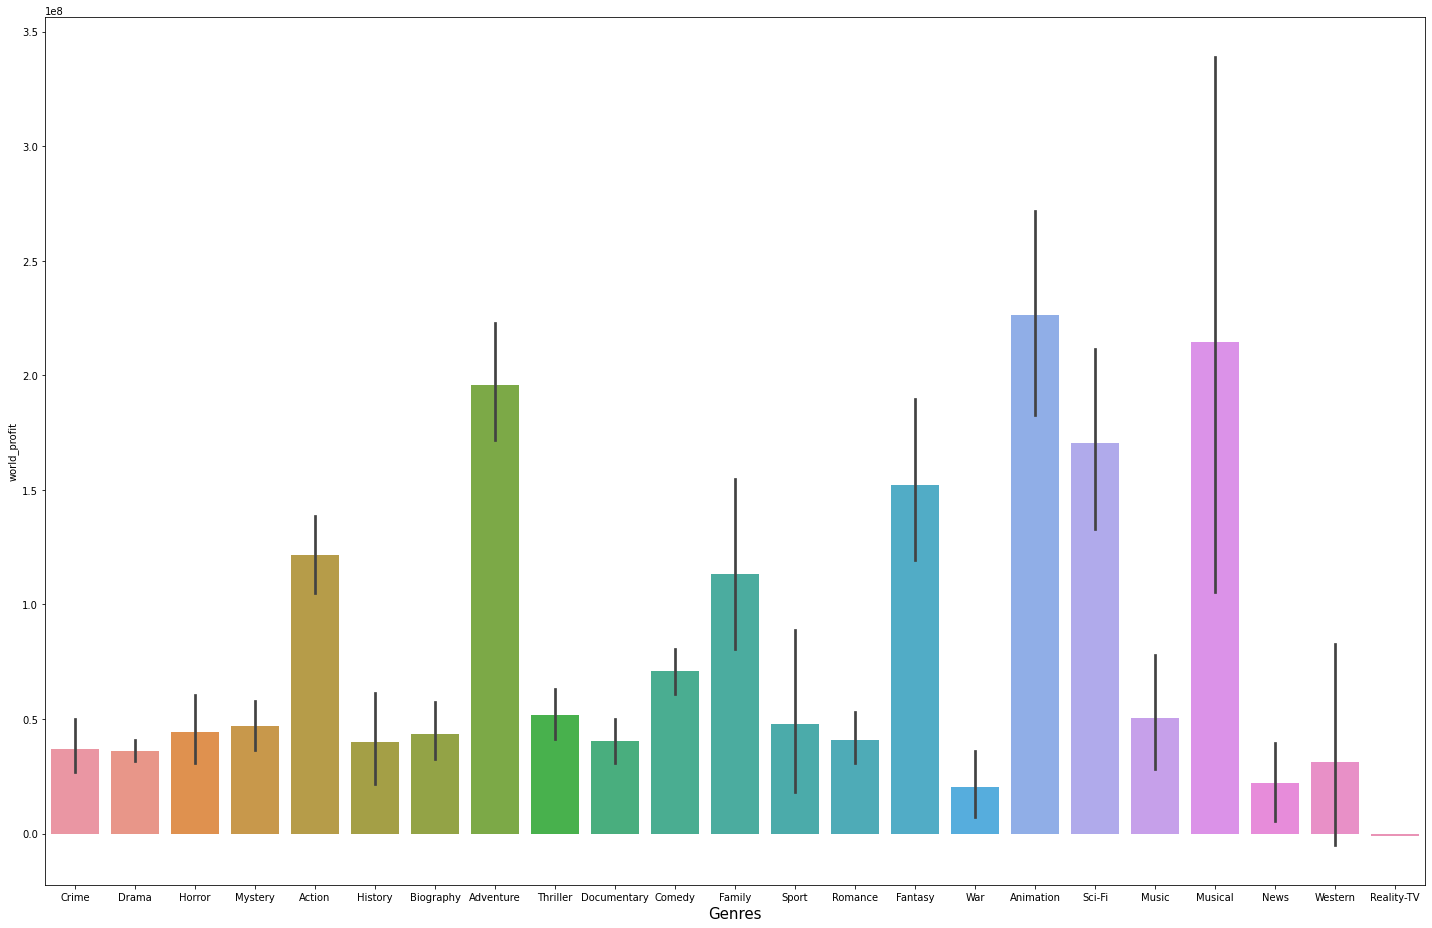

In [14]:
# here we are creating a bar chart to compare the genres with the profit of each movie (world_profit)
fig, ax = plt.subplots(figsize = (20,13))
sns.barplot(x = 'genres', y = 'world_profit', data = df,  ax = ax)
ax.set_xlabel('Genres', fontsize=15)
plt.tick_params(labelsize=10)
fig.tight_layout();

In [8]:
new_df = df.query("genres in ('Action','Adventure', 'Family', 'Fantasy', 'Animation', 'Sci-Fi')")

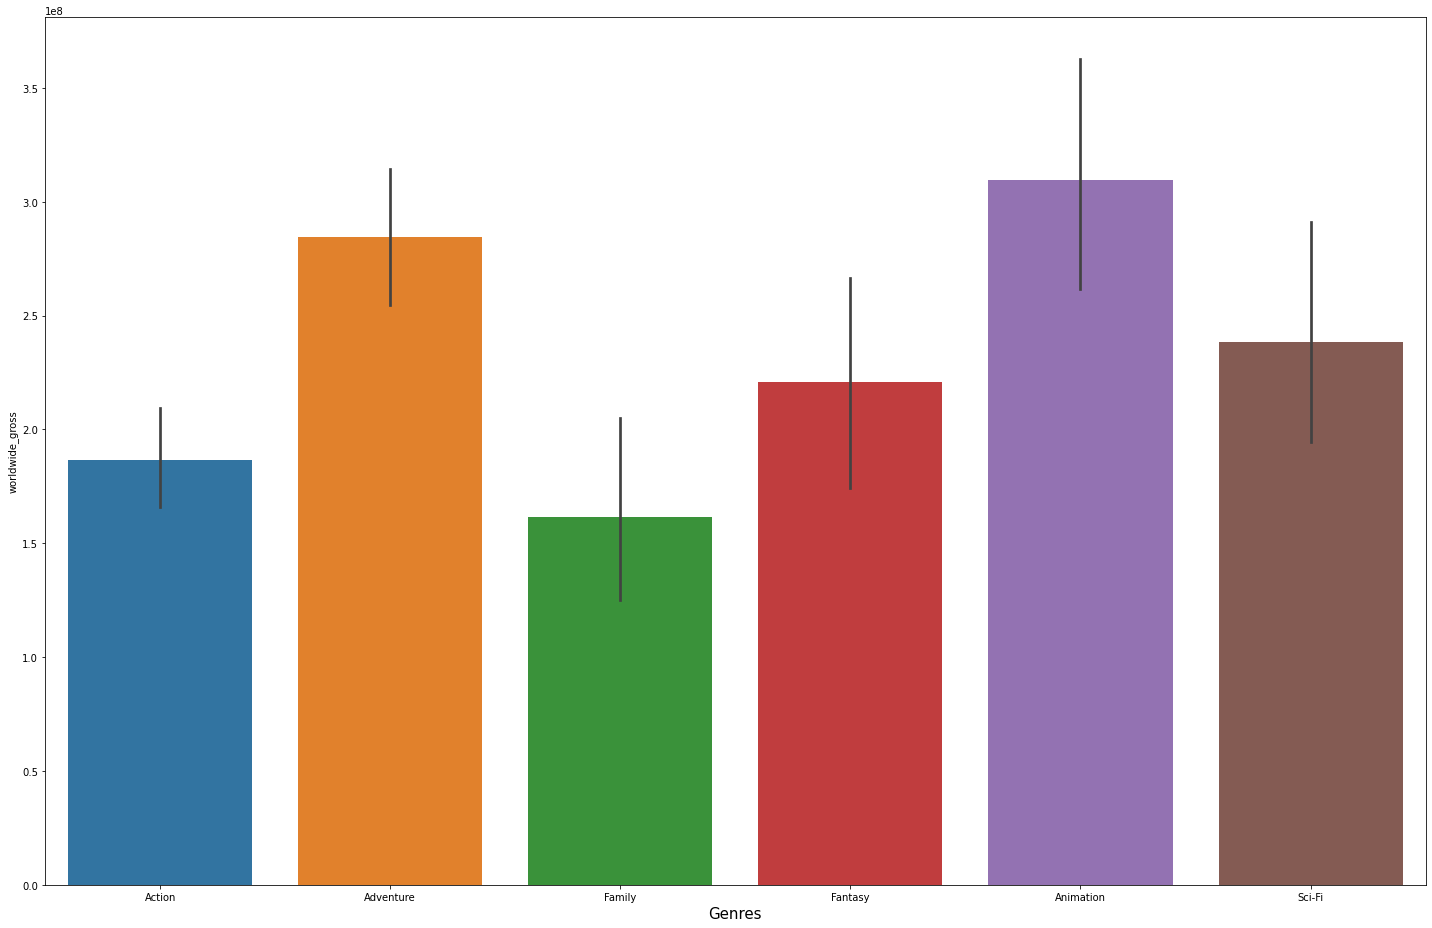

In [9]:
fig, ax = plt.subplots(figsize = (20,13))
sns.barplot(x = 'genres', y = 'worldwide_gross', data = new_df,  ax = ax)
ax.set_xlabel('Genres', fontsize=15)
plt.tick_params(labelsize=10)
fig.tight_layout();